In [2]:
import numpy as np
import pylab as pl
import pandas as pd
from scipy import interpolate, signal
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

# A Historical Analysis of Mixed Martial Arts

Mixed Martial Arts (or MMA) is one of the most popular and watched sports around the world today. The UFC, the premier MMA organization, was recently sold for $4.025 billion, which remains the single largest sports-based acquisition ever. With pay-per-view events regularly crossing the 1 million mark, and with global fighter superstars such as Conor McGregor and Georges St. Pierre, MMA has come a long way from its modern professional genesis in the late '80s/early '90s, when it languished in the West as a forgotten, often disparaged, fledgling sport.

Perhaps even more spectacular than it's shift in popularity in the last 30 years however, is the extraordinary amount of change that can be seen in the ring itself.

Watching a fight in 1993 on UFC 1 and watching a fight on UFC 256 in 2020

In [3]:
# import the data set, specify the date column, and set the date column to be the index for all the fights
ufc_data = pd.read_csv('UFC Data/data(93-2019).csv', parse_dates=['date'], index_col=['date'])

# view the first few rows of the data set
ufc_data.head

<bound method NDFrame.head of                        R_fighter       B_fighter               Referee  \
date                                                                     
2019-06-08          Henry Cejudo   Marlon Moraes          Marc Goddard   
2019-06-08  Valentina Shevchenko     Jessica Eye       Robert Madrigal   
2019-06-08         Tony Ferguson  Donald Cerrone       Dan Miragliotta   
2019-06-08         Jimmie Rivera        Petr Yan       Kevin MacDonald   
2019-06-08           Tai Tuivasa   Blagoy Ivanov       Dan Miragliotta   
...                          ...             ...                   ...   
1993-11-12        Gerard Gordeau    Kevin Rosier  Joao Alberto Barreto   
1993-11-12          Ken Shamrock   Patrick Smith  Joao Alberto Barreto   
1993-11-12          Royce Gracie   Art Jimmerson  Joao Alberto Barreto   
1993-11-12          Kevin Rosier    Zane Frazier  Joao Alberto Barreto   
1993-11-12        Gerard Gordeau      Teila Tuli  Joao Alberto Barreto   

       

In [4]:
# list out all the columns of the dataset
list(ufc_data.columns)

['R_fighter',
 'B_fighter',
 'Referee',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_opp_GROUND_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_opp_KD',
 'B_avg_opp_LEG

In [5]:
# view dataframe info
ufc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5144 entries, 2019-06-08 to 1993-11-12
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(8)
memory usage: 5.7+ MB


In [6]:
# view summary statistics
ufc_data.describe()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,5144.000000,5144.000000,5144.000000,5144.0,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,...,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5140.000000,4828.000000,5141.000000,4972.000000,5080.000000
mean,3.119362,0.429821,0.837286,0.0,8.689387,6.083457,8.240461,5.556352,53.156807,19.329445,...,1.177294,1.254860,0.777605,0.071345,3.598173,179.274089,183.664412,172.075861,29.171963,29.442323
std,0.631457,0.731325,1.306203,0.0,7.087703,5.074464,7.575422,5.429531,41.252426,15.961112,...,1.600135,1.801056,1.326056,0.277771,3.709519,8.638978,10.304375,35.164075,4.078538,4.141927
min,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,3.000000,0.000000,0.000000,0.0,3.500000,2.333333,3.000000,2.000000,22.000000,7.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,172.720000,177.800000,145.000000,26.000000,26.000000
50%,3.000000,0.000000,0.000000,0.0,7.000000,5.000000,6.333333,4.200000,44.666667,15.200000,...,1.000000,1.000000,0.000000,0.000000,2.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,3.000000,1.000000,1.000000,0.0,12.225000,8.500000,11.422222,7.738636,74.333333,27.142857,...,2.000000,2.000000,1.000000,0.000000,5.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,6.000000,13.000000,0.0,49.000000,39.000000,87.000000,68.000000,271.000000,130.000000,...,10.000000,11.000000,13.000000,2.000000,20.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [7]:
# make sure that the index has been assigned properly
ufc_data.index

DatetimeIndex(['2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08',
               '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08',
               '2019-06-08', '2019-06-08',
               ...
               '1994-03-11', '1994-03-11', '1993-11-12', '1993-11-12',
               '1993-11-12', '1993-11-12', '1993-11-12', '1993-11-12',
               '1993-11-12', '1993-11-12'],
              dtype='datetime64[ns]', name='date', length=5144, freq=None)

In [8]:
# the data is currently split into the averages for each fighter heading into the bout, 
# corresponding to red (R) and blue (B) corners. To get at total averages for fighters,
# these corresponding values have to be averaged. To accomplish this, first create new data frames
# containing just blue and red corner fighter data respectively
ufc_data_B = ufc_data.loc[:, ufc_data.columns.str.startswith('B_avg')]
ufc_data_R = ufc_data.loc[:, ufc_data.columns.str.startswith('R_avg')]

In [9]:
# make sure all columns and rows were captured in the fighter data and match
print("B Data Shape: " + str(ufc_data_B.shape))
print ("R Data Shape: " + str(ufc_data_R.shape))

B Data Shape: (5144, 48)
R Data Shape: (5144, 48)


In [10]:
# remove B tags from all blue corner column headings to allow for simpler concatenation
ufc_data_B.columns = ufc_data_B.columns.str[1:]
ufc_data_B.columns

Index(['_avg_BODY_att', '_avg_BODY_landed', '_avg_CLINCH_att',
       '_avg_CLINCH_landed', '_avg_DISTANCE_att', '_avg_DISTANCE_landed',
       '_avg_GROUND_att', '_avg_GROUND_landed', '_avg_HEAD_att',
       '_avg_HEAD_landed', '_avg_KD', '_avg_LEG_att', '_avg_LEG_landed',
       '_avg_PASS', '_avg_REV', '_avg_SIG_STR_att', '_avg_SIG_STR_landed',
       '_avg_SIG_STR_pct', '_avg_SUB_ATT', '_avg_TD_att', '_avg_TD_landed',
       '_avg_TD_pct', '_avg_TOTAL_STR_att', '_avg_TOTAL_STR_landed',
       '_avg_opp_BODY_att', '_avg_opp_BODY_landed', '_avg_opp_CLINCH_att',
       '_avg_opp_CLINCH_landed', '_avg_opp_DISTANCE_att',
       '_avg_opp_DISTANCE_landed', '_avg_opp_GROUND_att',
       '_avg_opp_GROUND_landed', '_avg_opp_HEAD_att', '_avg_opp_HEAD_landed',
       '_avg_opp_KD', '_avg_opp_LEG_att', '_avg_opp_LEG_landed',
       '_avg_opp_PASS', '_avg_opp_REV', '_avg_opp_SIG_STR_att',
       '_avg_opp_SIG_STR_landed', '_avg_opp_SIG_STR_pct', '_avg_opp_SUB_ATT',
       '_avg_opp_TD_att', '_a

In [11]:
# remove R tags from all red corner column headings to allow for simpler concatenation
ufc_data_R.columns = ufc_data_R.columns.str[1:]
ufc_data_R.columns

Index(['_avg_BODY_att', '_avg_BODY_landed', '_avg_CLINCH_att',
       '_avg_CLINCH_landed', '_avg_DISTANCE_att', '_avg_DISTANCE_landed',
       '_avg_GROUND_att', '_avg_GROUND_landed', '_avg_HEAD_att',
       '_avg_HEAD_landed', '_avg_KD', '_avg_LEG_att', '_avg_LEG_landed',
       '_avg_PASS', '_avg_REV', '_avg_SIG_STR_att', '_avg_SIG_STR_landed',
       '_avg_SIG_STR_pct', '_avg_SUB_ATT', '_avg_TD_att', '_avg_TD_landed',
       '_avg_TD_pct', '_avg_TOTAL_STR_att', '_avg_TOTAL_STR_landed',
       '_avg_opp_BODY_att', '_avg_opp_BODY_landed', '_avg_opp_CLINCH_att',
       '_avg_opp_CLINCH_landed', '_avg_opp_DISTANCE_att',
       '_avg_opp_DISTANCE_landed', '_avg_opp_GROUND_att',
       '_avg_opp_GROUND_landed', '_avg_opp_HEAD_att', '_avg_opp_HEAD_landed',
       '_avg_opp_KD', '_avg_opp_LEG_att', '_avg_opp_LEG_landed',
       '_avg_opp_PASS', '_avg_opp_REV', '_avg_opp_SIG_STR_att',
       '_avg_opp_SIG_STR_landed', '_avg_opp_SIG_STR_pct', '_avg_opp_SUB_ATT',
       '_avg_opp_TD_att', '_a

In [12]:
# combine the blue and red corner fighter data by averaging each corresponding column
ufc_combined_fighter = pd.concat([ufc_data_R, ufc_data_B]).groupby('date', as_index=True).mean()
ufc_combined_fighter

,_avg_BODY_att,_avg_BODY_landed,_avg_CLINCH_att,_avg_CLINCH_landed,_avg_DISTANCE_att,_avg_DISTANCE_landed,_avg_GROUND_att,_avg_GROUND_landed,_avg_HEAD_att,_avg_HEAD_landed,...,_avg_opp_REV,_avg_opp_SIG_STR_att,_avg_opp_SIG_STR_landed,_avg_opp_SIG_STR_pct,_avg_opp_SUB_ATT,_avg_opp_TD_att,_avg_opp_TD_landed,_avg_opp_TD_pct,_avg_opp_TOTAL_STR_att,_avg_opp_TOTAL_STR_landed
date,,,,,,,,,,,,,,,,,,,,,
1993-11-12,0.750000,0.583333,1.500000,0.666667,3.833333,1.333333,2.750000,2.333333,6.583333,3.500000,...,0.000000,6.500000,2.666667,0.153333,0.000000,0.333333,0.000000,0.000000,8.666667,4.833333
1994-03-11,0.578125,0.453125,0.484375,0.453125,2.209375,0.847917,4.767708,2.944792,5.722917,3.267708,...,0.062500,2.983333,1.219792,0.394104,0.322917,0.472917,0.246875,0.181771,14.632292,12.025000
1994-09-09,0.250000,0.250000,1.035714,1.035714,1.369048,0.321429,2.017857,2.017857,3.886905,3.017857,...,0.208333,3.154762,1.809524,0.366190,0.208333,0.779762,0.285714,0.160714,10.261905,8.833333
1994-12-16,0.288194,0.090278,1.019097,0.613542,2.675000,1.484028,9.306944,6.227778,10.775694,6.679514,...,0.042014,4.471528,2.470139,0.345132,0.187500,0.376042,0.146528,0.146528,7.096181,4.677778
1995-04-07,0.351010,0.300505,0.285354,0.204545,0.260101,0.040404,5.772896,3.925926,5.767845,3.792088,...,0.037879,2.898485,1.570707,0.350414,0.288889,0.068182,0.030303,0.030303,14.938721,13.165825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-04,13.795124,9.176664,8.723804,5.970097,90.205135,35.236761,10.499951,7.083133,87.099995,32.334710,...,0.076726,98.964288,42.191134,0.412070,0.260409,3.176797,0.956069,0.228490,111.931840,53.623479
2019-05-11,10.765154,7.457336,7.921644,5.466883,89.710598,34.985833,9.759442,7.048724,88.776522,33.712124,...,0.155637,112.829591,49.100794,0.442661,0.505871,3.713388,1.169021,0.242771,140.837948,73.352098
2019-05-18,10.875564,7.475545,8.135669,5.565738,67.059554,25.662579,12.661452,8.776037,71.074468,27.500235,...,0.084664,70.976343,30.299735,0.441001,0.323602,3.298121,1.134692,0.181661,88.826187,46.219509


In [13]:
# resample the combined data to present the yearly averages of relevant statistics
ufc_yearly_mean = ufc_combined_fighter.resample('Y').mean()
ufc_yearly_mean

,_avg_BODY_att,_avg_BODY_landed,_avg_CLINCH_att,_avg_CLINCH_landed,_avg_DISTANCE_att,_avg_DISTANCE_landed,_avg_GROUND_att,_avg_GROUND_landed,_avg_HEAD_att,_avg_HEAD_landed,...,_avg_opp_REV,_avg_opp_SIG_STR_att,_avg_opp_SIG_STR_landed,_avg_opp_SIG_STR_pct,_avg_opp_SUB_ATT,_avg_opp_TD_att,_avg_opp_TD_landed,_avg_opp_TD_pct,_avg_opp_TOTAL_STR_att,_avg_opp_TOTAL_STR_landed
date,,,,,,,,,,,,,,,,,,,,,
1993-12-31,0.750000,0.583333,1.500000,0.666667,3.833333,1.333333,2.750000,2.333333,6.583333,3.500000,...,0.000000,6.500000,2.666667,0.153333,0.000000,0.333333,0.000000,0.000000,8.666667,4.833333
1994-12-31,0.372106,0.264468,0.846396,0.700794,2.084474,0.884458,5.364170,3.730142,6.795172,4.321693,...,0.104282,3.536541,1.833151,0.368476,0.239583,0.542907,0.226372,0.163004,10.663459,8.512037
1995-12-31,0.518342,0.405961,1.487753,1.001699,2.549769,0.839971,4.650253,2.933377,7.261067,3.824795,...,0.059154,7.561076,3.492116,0.396283,0.394589,0.588022,0.295083,0.216491,22.830323,17.267689
1996-12-31,2.005752,1.646729,4.020215,2.369522,3.925146,1.221376,7.276618,5.542744,12.511684,6.974839,...,0.128003,9.486958,5.088449,0.421885,0.269766,0.926236,0.319577,0.186671,27.888658,22.357184
1997-12-31,1.798120,1.646792,4.915375,3.019649,5.641204,2.935679,8.704258,6.290640,15.679056,9.144560,...,0.026548,10.944246,5.532144,0.394859,0.281423,0.694116,0.263022,0.153836,20.597851,14.034780
1998-12-31,3.258932,3.043883,5.662277,4.019389,9.729454,3.942537,7.154225,5.053868,17.385913,8.601633,...,0.233770,17.939325,9.763987,0.420008,0.431224,1.485827,0.690574,0.299594,39.122979,29.584515
1999-12-31,3.267394,2.689357,5.266645,3.321415,16.414236,6.639184,9.829649,5.859339,23.688324,9.676921,...,0.176273,25.270916,10.884463,0.384123,0.674171,1.924055,0.797988,0.286929,48.570362,32.403390
2000-12-31,4.399555,3.748034,9.540915,6.196140,14.727044,4.400583,13.639454,8.159909,30.590506,12.731427,...,0.068525,27.824110,12.780447,0.498028,0.440290,1.735997,0.724741,0.287412,52.334945,35.528289
2001-12-31,4.105219,3.329668,6.225306,3.935328,17.982136,6.167779,12.653078,7.905446,28.928322,11.746589,...,0.153338,26.901645,11.497363,0.399821,0.435757,2.234517,0.663874,0.199292,52.410280,35.729289


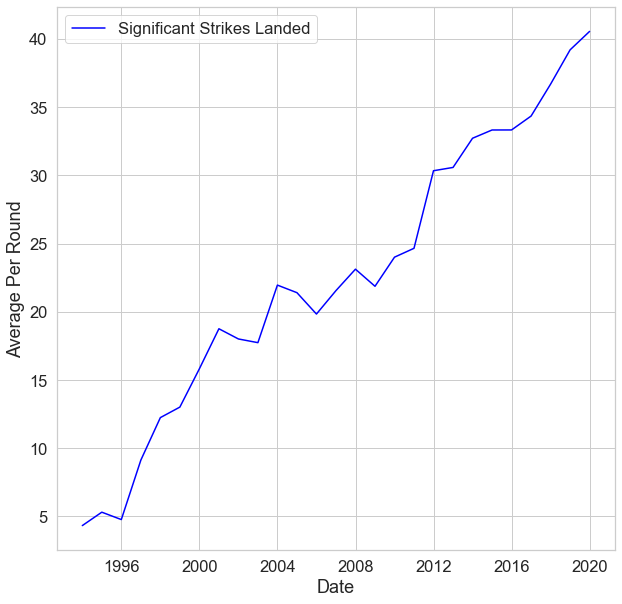

In [26]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(ufc_yearly_mean.index.values,
           ufc_yearly_mean['_avg_SIG_STR_landed'],
           color='blue', label='Significant Strikes Landed')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Average Per Round")

plt.legend()

plt.show()

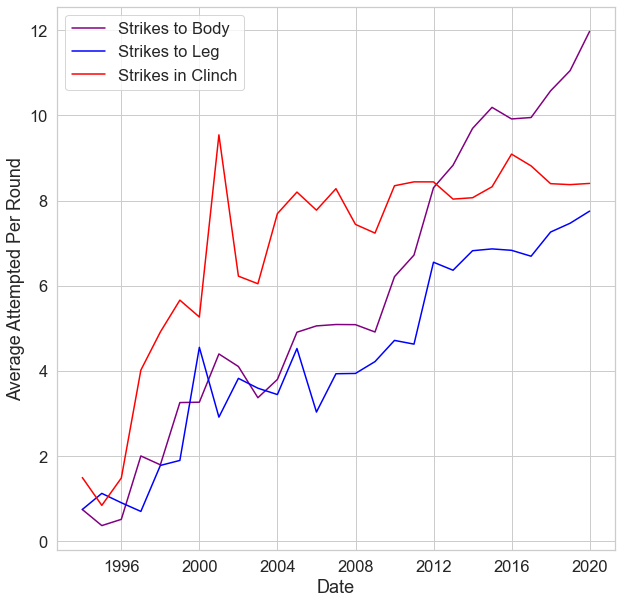

In [30]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(ufc_yearly_mean.index.values,
           ufc_yearly_mean['_avg_BODY_att'],
           color='purple', label='Strikes to Body')

ax.plot(ufc_yearly_mean.index.values,
           ufc_yearly_mean['_avg_LEG_att'],
           color='blue', label='Strikes to Leg')

ax.plot(ufc_yearly_mean.index.values,
           ufc_yearly_mean['_avg_CLINCH_att'],
           color='red', label='Strikes in Clinch')


# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Average Attempted Per Round")

plt.legend()

plt.show()

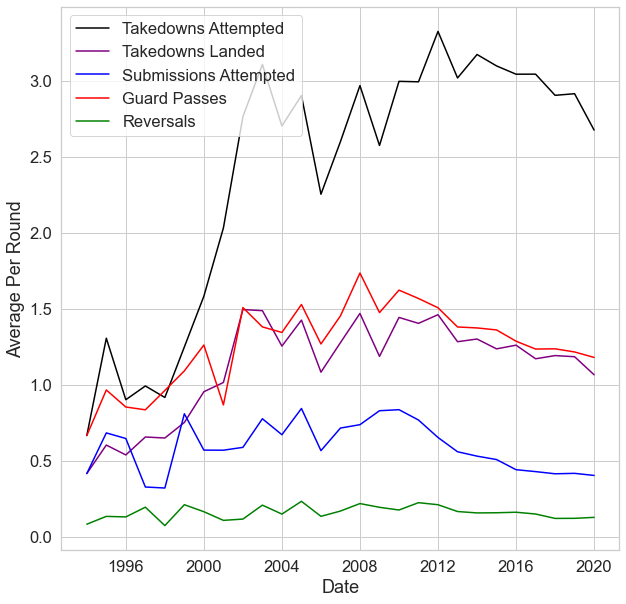

In [28]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(ufc_yearly_mean.index.values,
           ufc_yearly_mean['_avg_TD_att'],
           color='black', label='Takedowns Attempted')

# Add x-axis and y-axis
ax.plot(ufc_yearly_mean.index.values,
           ufc_yearly_mean['_avg_TD_landed'],
           color='purple', label='Takedowns Landed')

ax.plot(ufc_yearly_mean.index.values,
           ufc_yearly_mean['_avg_SUB_ATT'],
           color='blue', label='Submissions Attempted')

ax.plot(ufc_yearly_mean.index.values,
           ufc_yearly_mean['_avg_PASS'],
           color='red', label='Guard Passes')

ax.plot(ufc_yearly_mean.index.values,
           ufc_yearly_mean['_avg_REV'],
           color='green', label='Reversals')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Average Per Round")

plt.legend()

plt.show()

In [32]:
ufc_recent_data = pd.read_csv('UFC Data/ufc-master(2010-2020).csv', parse_dates=['date'], index_col=['date'])

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,location,country,Winner,title_bout,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
date,,,,,,,,,,,,,,,,,,,,,
2020-11-28,Anthony Smith,Devin Clark,-139,115,71.942446,115.0,"Las Vegas, Nevada, USA",USA,Red,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-28,Miguel Baeza,Takashi Sato,-175,140,57.142857,140.0,"Las Vegas, Nevada, USA",USA,Red,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-28,Josh Parisian,Parker Porter,-200,160,50.000000,160.0,"Las Vegas, Nevada, USA",USA,Blue,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-28,Spike Carlyle,Bill Algeo,-177,140,56.497175,140.0,"Las Vegas, Nevada, USA",USA,Blue,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-28,Ashlee Evans-Smith,Norma Dumont,-137,110,72.992701,110.0,"Las Vegas, Nevada, USA",USA,Blue,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-03-21,Duane Ludwig,Darren Elkins,-155,135,64.516129,135.0,"Broomfield, Colorado, USA",USA,Blue,False,...,0.0,2.0,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-21,John Howard,Daniel Roberts,-210,175,47.619048,175.0,"Broomfield, Colorado, USA",USA,Red,False,...,1.0,1.0,1.00,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2010-03-21,Brendan Schaub,Chase Gormley,-260,220,38.461538,220.0,"Broomfield, Colorado, USA",USA,Red,False,...,0.0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
list(ufc_recent_data.columns)
ufc_recent_data['Total TD Attempted Bout'] = ufc_recent_data['B_td_landed_bout'] + ufc_recent_data['R_td_landed_bout']

In [40]:
ufc_recent_yearly_mean = ufc_recent_data.resample('Y').mean()
ufc_recent_yearly_mean

,R_odds,B_odds,R_ev,B_ev,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,...,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout,Total TD Attempted Bout
date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,-87.314286,45.152381,99.571430,153.443171,0.057143,3.095238,0.433333,0.885714,0.000000,22.757586,...,3.251656,0.291258,0.310993,0.675497,0.662252,1.562914,1.225166,0.218543,0.192053,2.523179
2011-12-31,-104.989831,70.854237,96.903766,168.159465,0.050847,3.108475,0.444068,0.796610,0.000000,29.410610,...,2.900000,0.315444,0.231056,0.550000,0.372222,1.188889,0.844444,0.100000,0.144444,2.394444
2012-12-31,-125.825826,97.288288,89.790343,179.135289,0.057057,3.168168,0.447447,0.756757,0.000000,31.343001,...,2.576419,0.293537,0.187118,0.384279,0.414847,1.240175,0.781659,0.065502,0.126638,1.986900
2013-12-31,-123.202128,91.316489,95.191695,184.838340,0.061170,3.164894,0.436170,0.755319,0.000000,32.010213,...,2.777778,0.337984,0.266955,0.485597,0.333333,1.181070,0.855967,0.139918,0.135802,2.411523
2014-12-31,-154.388664,114.868421,93.048531,204.834760,0.052632,3.204453,0.404858,0.716599,0.000000,33.382516,...,3.175595,0.343750,0.236071,0.440476,0.315476,1.419643,1.065476,0.139881,0.154762,2.330357
2015-12-31,-135.601293,73.092672,100.659480,184.639392,0.056034,3.202586,0.465517,0.965517,0.000000,33.593906,...,3.044910,0.288832,0.223084,0.374251,0.287425,1.287425,1.032934,0.131737,0.110778,2.218563
2016-12-31,-140.621118,79.345756,82.364755,164.627430,0.049689,3.200828,0.486542,0.865424,0.000000,33.440961,...,2.525773,0.289038,0.248179,0.381443,0.278351,1.323024,0.859107,0.123711,0.147766,2.161512
2017-12-31,-91.927273,35.629545,103.787333,154.955728,0.045455,3.193182,0.502273,0.913636,0.000000,36.334027,...,2.863118,0.264905,0.256464,0.338403,0.304183,1.201521,0.832700,0.129278,0.114068,2.026616
2018-12-31,-90.976645,26.093418,107.360055,150.843482,0.046709,3.199575,0.481953,0.959660,0.000000,40.069748,...,2.460000,0.288067,0.262633,0.360000,0.353333,1.053333,0.996667,0.143333,0.110000,2.043333


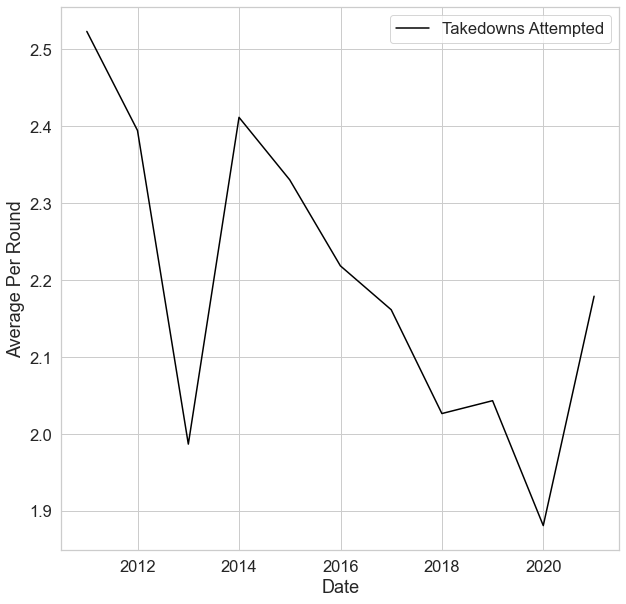

In [43]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(ufc_recent_yearly_mean.index.values,
           ufc_recent_yearly_mean['Total TD Attempted Bout'],
           color='black', label='Takedowns Attempted')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Average Per Round")

plt.legend()

plt.show()